# Greetings traveller! 

Welcome to Week 1 of the AIAP coursework. In the next 6 weeks, you will be *travelling* through the machine learning space, where we will be looking at various different machine learning problems and how to solve them. We will be taking a quick sweep through the many areas of analytics and machine learning, including learning about learning from data itself.

For some, this may be a revision of previously learned concepts. In that case we would advice you to take this opportunity to refresh yourself and find clarity in areas you may have previously breezed past. For others, many areas will be new, and we would advice you to take your time, and build your fundamentals well, as they will pay off in the long term.

Our course is designed to train commandos in the machine learning space - people who can not only do statistical modelling and learning, but also learn to work with data, and in the process write high quality, collaboration-focused or production-geared code. Different individuals may find different areas challenging; as such, do ask questions and help each other out when necessary.

This is not a course for pure beginners. Some basic areas will not be touched upon in the class, and we will initially highlight them with <font color=red>red</font> text. We are not saying that 100% of the participants know these concepts with 100% confidence. Feel free to approach a peer or any of us if you require assistance, especially highly technical assistance.

<font color=red>Checkpoint: you should know how to use Jupyter notebooks!</font>

Now, let's get into week one of the course! __Good luck, have fun.__

# 1. Initial Modelling 

Our problem this week is the el classico: the Titanic dataset, a dataset probably done to death by fellow travellers of the machine learning space. There is a reason why this dataset is so popular - it demands for all the fundamentals required of statistical modelling, while also not having overbearing technical demands. With just 891 rows of data, the problem can be solved on any laptop. While most machines would not face a challenge this week, we would recommend you to slowly build up your technical stack, so that as heavier datasets come about (in the size of GBs), you will not be limited by them.
<font color=red>Checkpoint: you should know that this is a classification problem.</font>

First, go grab the data. The data is available at https://www.kaggle.com/c/titanic/data, you will need to register an account to retrieve it.

Since we are talking about downloading data, we should take this time to set up your folder. One such way (our recommended way) to do it as to create a project folder, then leave your notebooks in the root of that folder. Your code base, which we will be starting to build over time, should be in a `src` subfolder, while your data should be in a `data` folder, with a tree structure as shown:

```
aiap
 |- src
 |- data
 |   |- train.csv
 |   |- test.csv
 |- week1.ipynb
```

This is an opinionated format - we suggest this only for simplicity reasons. For discussion on this, you may visit the below resources [Jeanne to advise]:
- Software Carpentry
- Jenny Bryan's stuff

Now, we are ready to do some coding work. First, import the necessary libraries you need - tools like `np`, `pd`, `plt` and your `sklearn` libraries.
<font color=red>Checkpoint: you should know what and how to import your required resources.</font>

In [131]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Import your data. Using the `train_test_split` method, reserve some validation data for evaluation use.
<font color=red>Checkpoint: you should know why and how to create a basic validation dataset (hint: `sklearn.model_selection`).</font>

In [132]:
titanic = pd.read_csv('train.csv')

In [133]:
desc = titanic.describe(include='all')
desc

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Sedgwick, Mr. Charles Frederick Waddington",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [134]:
X_train, X_test, y_train, y_test = train_test_split(titanic[titanic.columns.drop('Survived')], titanic['Survived'])

Train a stock model (with no custom parameters and report the accuracy score).

In [135]:
rf_initial = RandomForestClassifier()
rf_initial.fit(X_train, y_train)

ValueError: could not convert string to float: 'S'

In [127]:
rf_initial.score(X_test, y_test)

0.7399103139013453

You may see an accuracy of below 75% - this does not mean anything substantially, but it lets us know that a no-value-add approach to modelling will already generate this accuracy for us. Hence, our goal is to improve upon this current score, and reach as high as possible.

If you were to look at the leaderboards, you will see that accuracy scores go as high as 90+%. Truth be told, we don't think all of these scores are legitimate. The names of survivors are publicly available, so someone might have filled up an excel sheet and submitted it. Nevertheless, we should know that a score of ~90% is perhaps possible.

Consideration: what is the metric we are to evaluate our accuracy?

# 2. Exploring the data 

## Initial Description 

Conduct some initial exploration of this data. This could be through dataset level plots, correlation charts and table describes, as well as by understanding what kind of information is available, or not available (i.e. missing). Write a paragraph on what you observe in the data. There is no correct answer, but do present useful and insightful information as much as possible.

This part of the notebook should be helpful to someone who is trying to come into your project, but has no knowledge of the data. Given that this is an easy dataset, this section will not be very challenging, but in complex, real-world problems, this section may take months in an iterative manner.
<font color=red>Checkpoint: you should know how to manipulate, transform and plot interesting informaiton.</font>

## Individual Variables 

Now, we go deeper into individual variables. For each variable, provide 1 or more plots, tables or descriptions that best capture the nuance of that column. There is once again no correct answer, but there is a gold standard.

Samples of this can be found in Kaggle's kernels page. While we value pretty charts, we value insights much more. Where insightful information is found, please indicate them in your notebook for your reader.

### PassengerId

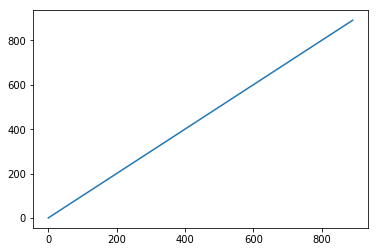

In [7]:
titanic.PassengerId.plot()

An ID variable, which will probably have no impact on the data. However, we should leave it inside and let the model determine if the variable matters, and if it does, try to understand how it helps.

### Survived

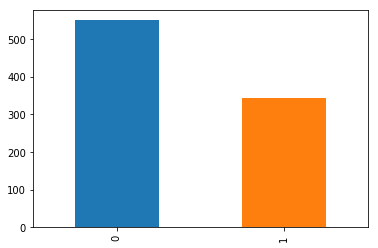

In [21]:
titanic.Survived.value_counts().plot.bar()

Considering that some 62% of people died, our naive model would have already predicted 62% accuracy.

### Pclass

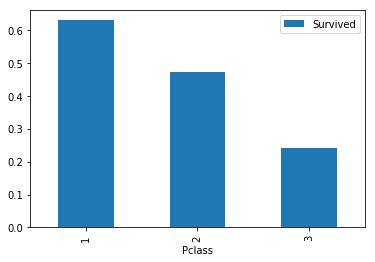

In [27]:
titanic.groupby('Pclass')[['Survived']].mean().plot.bar()

In [28]:
titanic.groupby('Pclass')[['Survived']].count()

,Survived
Pclass,
1,216
2,184
3,491


Pclass=3 (491) has a low chance of survival of 25%, while Pclass=1 (216) is super high >60%.

### Name

In [30]:
titanic.Name.sample(20)

122                                 Nasser, Mr. Nicholas
112                               Barton, Mr. David John
168                                  Baumann, Mr. John D
53     Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...
50                            Panula, Master. Juha Niilo
359                    Mockler, Miss. Helen Mary "Ellie"
699             Humblen, Mr. Adolf Mathias Nicolai Olsen
416      Drew, Mrs. James Vivian (Lulu Thorne Christian)
585                                  Taussig, Miss. Ruth
276                    Lindblom, Miss. Augusta Charlotta
222                              Green, Mr. George Henry
286                              de Mulder, Mr. Theodore
720                    Harper, Miss. Annie Jessie "Nina"
67                              Crease, Mr. Ernest James
137                          Futrelle, Mr. Jacques Heath
854        Carter, Mrs. Ernest Courtenay (Lilian Hughes)
545                         Nicholson, Mr. Arthur Ernest
649                      Stanle

While we know that names are 100% unique - 891 counts of unique names in 891 rows of data, which is to be expected, we can also suspect that people may belong to a family, so some people have the last surname.

In [32]:
titanic['lastname'] = titanic.Name.map(lambda x: x.split(',')[0])
titanic.lastname.value_counts()[:10]

Andersson    9
Sage         7
Carter       6
Johnson      6
Panula       6
Skoog        6
Goodwin      6
Rice         5
Brown        4
Harris       4
Name: lastname, dtype: int64

In [33]:
titanic[titanic['lastname'] == 'Andersson']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,Andersson
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S,Andersson
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S,Andersson
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S,Andersson
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S,Andersson
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S,Andersson
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S,Andersson
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,Andersson
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S,Andersson


Out of everyone in the Andersson family, only those with 7.925 ticket fares survived - they were 17 and 27 years old respectively. In fact, "Wennerstrom" seems to not be with the rest of the family - as an individual person, he was able to survive, while only the eldest teenage girl from the large family of 7 survived.

### Sex

        Survived
Sex             
female       314
male         577


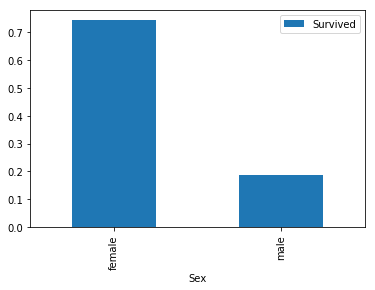

In [36]:
print(titanic.groupby('Sex')[['Survived']].count())
titanic.groupby('Sex')[['Survived']].mean().plot.bar();

Females are disproportionately more likely to survive - >70% of the 314 females survived, while <20% of the 577 males survived.

### Age

In [39]:
titanic[['Survived', 'Age']].dropna().groupby('Survived').mean()

,Age
Survived,
0,30.626179
1,28.343690


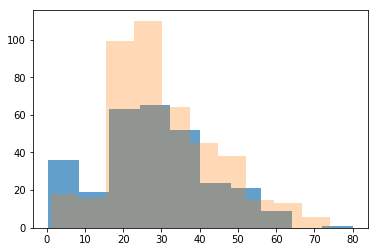

In [60]:
valid_ages = titanic[['Survived', 'Age']].dropna()
fig, ax = plt.subplots(1, 1)
ax.hist(valid_ages[valid_ages.Survived == 1].Age, alpha=0.7);
ax.hist(valid_ages[valid_ages.Survived == 0].Age, alpha=0.3);
plt.show()

It looks like the shape both groups (survive vs did not survive) is rather similar, with not survived having more height as only a minority survived. However, we can also see that at certain age groups, they are equal, but at other age groups, one is much more than other (e.g. 0-10).

### SibSp

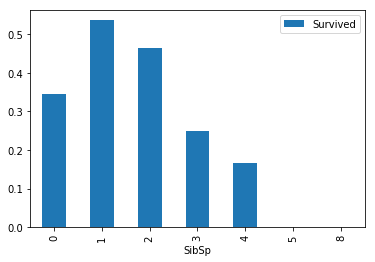

In [65]:
titanic.groupby('SibSp')[['Survived']].mean().plot.bar()

It seens that as the number of siblings/spouses increase, the likelihood of survival decreases. This could have many explanations - that each family were given a quota for example, or that females/children were allowed first. One explanation for SibSp=0 to have a low rate is that these are young men, and hence are given less priority. Regardless, this is a clear observation.

### Parch

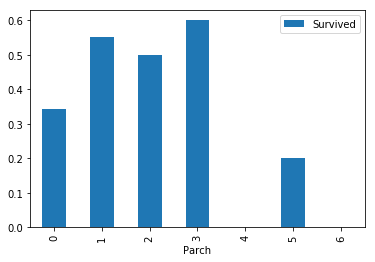

In [67]:
titanic.groupby('Parch')[['Survived']].mean().plot.bar();

???

### Ticket

In [68]:
np.unique(titanic.Ticket.values)

array(['110152', '110413', '110465', '110564', '110813', '111240',
       '111320', '111361', '111369', '111426', '111427', '111428',
       '112050', '112052', '112053', '112058', '112059', '112277',
       '112379', '113028', '113043', '113050', '113051', '113055',
       '113056', '113059', '113501', '113503', '113505', '113509',
       '113510', '113514', '113572', '113760', '113767', '113773',
       '113776', '113781', '113783', '113784', '113786', '113787',
       '113788', '113789', '113792', '113794', '113796', '113798',
       '113800', '113803', '113804', '113806', '113807', '11668', '11751',
       '11752', '11753', '11755', '11765', '11767', '11769', '11771',
       '11774', '11813', '11967', '12233', '12460', '12749', '13049',
       '13213', '13214', '13502', '13507', '13509', '13567', '13568',
       '14311', '14312', '14313', '14973', '1601', '16966', '16988',
       '17421', '17453', '17463', '17464', '17465', '17466', '17474',
       '17764', '19877', '19928', '19943

There are way too many combinations of this, though we could do some feature engineering on for example the first 2 characters, the number of characters, the digits at the back, and the complete prefix. This will be done if feature engineering is required.

### Fare

Fare_bin
(-0.001, 7.55]        92
(7.55, 7.854]         87
(7.854, 8.05]        106
(8.05, 10.5]          78
(10.5, 14.454]        84
(14.454, 21.679]      88
(21.679, 27.0]        89
(27.0, 39.688]        91
(39.688, 77.958]      89
(77.958, 512.329]     87
dtype: int64


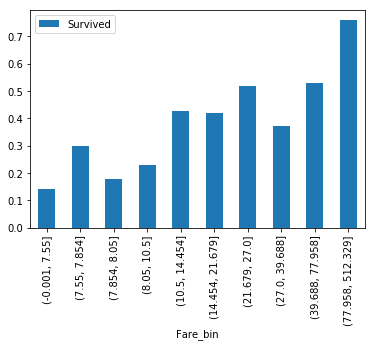

In [85]:
titanic['Fare_bin'] = pd.qcut(titanic.Fare, 10)
print(titanic.groupby('Fare_bin').size())
titanic.groupby('Fare_bin')[['Survived']].mean().plot.bar();

### Cabin

In [91]:
np.unique(titanic.Cabin.dropna().values)

array(['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A24', 'A26', 'A31',
       'A32', 'A34', 'A36', 'A5', 'A6', 'A7', 'B101', 'B102', 'B18',
       'B19', 'B20', 'B22', 'B28', 'B3', 'B30', 'B35', 'B37', 'B38',
       'B39', 'B4', 'B41', 'B42', 'B49', 'B5', 'B50', 'B51 B53 B55',
       'B57 B59 B63 B66', 'B58 B60', 'B69', 'B71', 'B73', 'B77', 'B78',
       'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101', 'C103',
       'C104', 'C106', 'C110', 'C111', 'C118', 'C123', 'C124', 'C125',
       'C126', 'C128', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C30',
       'C32', 'C45', 'C46', 'C47', 'C49', 'C50', 'C52', 'C54', 'C62 C64',
       'C65', 'C68', 'C7', 'C70', 'C78', 'C82', 'C83', 'C85', 'C86',
       'C87', 'C90', 'C91', 'C92', 'C93', 'C95', 'C99', 'D', 'D10 D12',
       'D11', 'D15', 'D17', 'D19', 'D20', 'D21', 'D26', 'D28', 'D30',
       'D33', 'D35', 'D36', 'D37', 'D45', 'D46', 'D47', 'D48', 'D49',
       'D50', 'D56', 'D6', 'D7', 'D9', 'E10', 'E101', 'E12', 'E121',
       'E17',

### Embarked

Embarked
C    168
Q     77
S    644
dtype: int64


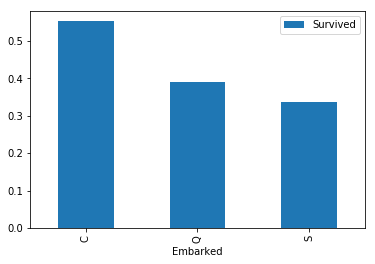

In [89]:
print(titanic[['Survived', 'Embarked']].dropna().groupby('Embarked').size())
titanic[['Survived', 'Embarked']].dropna().groupby('Embarked').mean().plot.bar();

## Overall Summary 

From your own exploration of the data, provide a few paragraphs in summary of the dataset. At this point, it may be helpful to provide a narrative which can reconstruct the situation aboard the titanic as it was sinking. This is also an opportunity to direct your attention towards areas where you feel information is raw and can be improved in your next section, through feature engineering.

# 3. Model Interpretation and Feature Engineering

In this section, we will begin by learning to appreciate the model interpretation methods related to decision trees and random forests. Then, we will move on to do some feature engineering - hopefully this will give us some information with respect to the dataset.

## Model Interpretation

### Feature importance
Plot a graph/table of feature importance of variables. Is there anything to be expected out of the data? Is there anything unexpected? Compare these findings with your teammate - are there any major differences in these plots?

By the way, does the PassengerId column end up significant for you? Does that make sense?

In [130]:
feature_importances = pd.DataFrame(rf_initial.feature_importances_,index = X_train.columns, columns=['importance'])\
    .sort_values('importance',ascending=False)
feature_importances

,importance
PassengerId,0.298404
Fare,0.268842
Sex_m,0.218999
Pclass,0.083796
Parch,0.054712
SibSp,0.045109
Embarked_S,0.017595
Embarked_C,0.012544


### Partial Dependence 

Another useful interpretation plot is partial dependence. `sklearn.ensemble` has a `plot_partial_dependence` library, but another great option is `pdpbox`. 

Todo: attempt partial dependence on this - does it even work?

https://www.kaggle.com/dansbecker/partial-dependence-plots

Explore partial dependence plots on your datasets. Confirm if these plots corrobate with the insights you achieved from data exploration. Identity new insights which you previously did not observe. Present a paragraph of your thoughts on your model's interpretation.

## Feature Engineering 

In this section, you should first briefly explain your thought process - what is good, what is lacking, and what are the potential areas of information the model has yet to exploit. Following which, do some feature engineering. After every engineered feature, re-run your model and observe if there is an improvement in scores.

Running your feature importance again at different points in time can help to validate if your variables are truly important, or are they simply collinear.


<font color=red>Checkpoint: you should know how to manipulate pandas columns, such as using lambdas.</font>

In [136]:
titanic['lastname'] = titanic['Name'].apply(lambda x: x.split(',')[0])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


# 4. Model Re-Training and Fine-Tuning

## Model Re-Training

When you are confident of your variables, re-run your model with all your variables again, and observe your feature importance. At times having extra variables may even deprove scores. You may also wish to remove features that show insignificant partial dependence. 

How much accuracy did these engineered features give? How important were these features? At this point in time, you may wish to talk to your peers and identify features they came up with (original ones, not those taken from the internet). This is a stage where brainstorming and contextual knowledge is extremely helpful.

## Model Tuning

Finally, we should do some model tuning. We previously ran a "default" model, with no customization inside our RandomForestClassifier model. However, if we were to look at the parameters, we'll see that there are many you can change.

In [137]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Evidently, there are many variables worth checking out. For now, some of the most salient ones are `max_depth`, `max_leaf_nodes`, `max_features` and `n_estimators`. These are in general, all parameters we tweak to decrease overfitting. Try tuning these parameters, plotting a graph of model accuracy against parameter variation for each variable.

Other useful parameters are `oob_score`, which serves as a validation set of unsampled data points during the bootstrap, and `n_jobs`, which parallelises the process. We recommend you set `oob_score` to `True` (and use the oob_score as a metric), and `n_jobs` to `-1` to speed up your training process.
<br /><br />
<font color=red>This is not a prerequisite per se, but at this point, you should try to understand the bootstrapping concept. After all, this single concept gave rise to random forests and many other statistical methods we know today!</font>

### Subsampling 

The `fastai` library has a very cool method called `set_rf_samples`, which sets the number of subsamples we use in each tree we initalize. For more information, you may refer [here on stackoverflow](https://stackoverflow.com/questions/44955555/how-can-i-set-sub-sample-size-in-random-forest-classifier-in-scikit-learn-espec). You might wish to play with this variable, as it can give you some improved performance.

### Cross Validation (Optional)

If we think about what we do with validation, we're actually taking a portion (20%) of our data out of our training set for validation purposes. This means that we are sacrificing training data (and hence predictive power) to create a less overfitted, more generalised model. There is a trade-off for our model: we remove overfitting (variance) by sacrificing predictive power (increasing bias). This is known as the bias variance trade-off, which we will go into more detail next week.

We will go into details next week, but in short, this can be avoided using cross validation. If you have done this before, you may use cross validation to improve the model here. Report your accuracy.

Otherwise, if we know all the validation scores for all our models, simply pick the best model in terms of validation score. Report your accuracy. 

Put back all our data into one big training set, and re-train the model using this training set. You can now make a prediction on your test set, and submit your result to Kaggle!

### Submission

What is your Kaggle leaderboard performance? Please provide your Kaggle username as well. Our expectation: at least 82%.

In [138]:
# Accuracy: ___
# Kaggle name: _____

# 5. Building your Random Forest from Scratch

Congratulations! You have completed the tutorial on random forests... not!

Apart from modelling, each week, you will also be expected to implement the models we are using. After all, the best way to learn is to implement from scratch. AI Apprentices are not only expected to model, but also do the necessary engineering for real life problems, and many such problems require custom code. For example, we may want to use subsampling to improve our model performance, but edge-cutting methods would not yet be available in common libraries. When this happens - and believe us, it almost certainly will, you will have to address these problems yourself.

Numerical programming might be new to some, if you did not come from the R/Matlab side of things. To get yourself up to speed with numerical programming in Python, we highly recommend Wes McKinney's [Python for Data Analysis, 2nd Ed.](https://www.safaribooksonline.com/library/view/python-for-data/9781491957653/)

### Structure TBC, but solutions are found in /src.

In [96]:
X_cols = titanic.columns
X_cols = X_cols.drop('Age')
X_cols = X_cols.drop('Cabin')
titanic = titanic[X_cols]

In [97]:
X_cols_cats = titanic.columns
X_cols_cats = X_cols_cats.drop('Name')
X_cols_cats = X_cols_cats.drop('Ticket')
titanic = titanic[X_cols_cats]

In [98]:
titanic['Sex_m'] = (titanic['Sex'] == 'male').astype('int')
titanic['Embarked_S'] = (titanic['Embarked'] == 'S').astype('int')
titanic['Embarked_C'] = (titanic['Embarked'] == 'C').astype('int')
titanic = titanic.drop(['Sex', 'Embarked'], axis=1)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Sex_m,Embarked_S,Embarked_C
0,1,0,3,1,0,7.2500,1,1,0
1,2,1,1,1,0,71.2833,0,0,1
2,3,1,3,0,0,7.9250,0,1,0
3,4,1,1,1,0,53.1000,0,1,0
4,5,0,3,0,0,8.0500,1,1,0


In [99]:
X_cols = titanic.columns
X_cols = X_cols.drop('Survived')
X_titanic = titanic[X_cols]
y_titanic = titanic['Survived']
X_titanic.head()

,PassengerId,Pclass,SibSp,Parch,Fare,Sex_m,Embarked_S,Embarked_C
0,1,3,1,0,7.2500,1,1,0
1,2,1,1,0,71.2833,0,0,1
2,3,3,0,0,7.9250,0,1,0
3,4,1,1,0,53.1000,0,1,0
4,5,3,0,0,8.0500,1,1,0


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, random_state=99)

In [101]:
from src.decision_tree import DecisionTree
from src.random_forest import RandomForest

In [102]:
dt = DecisionTree()

In [103]:
dt.fit(X_train.values, y_train.values)

In [104]:
preds_dt = dt.predict(X_test.values)
sum(preds_dt == y_test)/len(y_test)

0.7130044843049327

In [105]:
rf_0 = RandomForest()
rf_0.fit(X_train.values, y_train.values)

In [106]:
preds_rf = rf_0.predict(X_test.values)
sum(preds_rf == y_test)/len(y_test)

0.7354260089686099

In [110]:
rf_1 = RandomForest(n_trees=10, subsample_size=0.8, feature_proportion=0.8)
rf_1.fit(X_train.values, y_train.values)

In [111]:
preds_rf1 = rf_1.predict(X_test.values)
sum(preds_rf1 == y_test)/len(y_test)

0.8026905829596412

In [112]:
rf_2 = RandomForest(n_trees=100, subsample_size=0.5, feature_proportion=0.5)
rf_2.fit(X_train.values, y_train.values)
preds_rf2 = rf_2.predict(X_test.values)
sum(preds_rf2 == y_test)/len(y_test)

0.8116591928251121

In [117]:
rf_2 = RandomForest(n_trees=500, subsample_size=0.5, feature_proportion=0.5)
rf_2.fit(X_train.values, y_train.values)
preds_rf2 = rf_2.predict(X_test.values)
sum(preds_rf2 == y_test)/len(y_test)

0.8116591928251121